In [17]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [18]:
img = cv2.imread('build/projected.png',cv2.IMREAD_UNCHANGED)

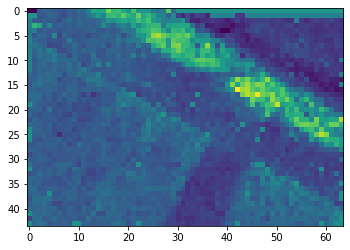

In [19]:
plt.imshow(img)

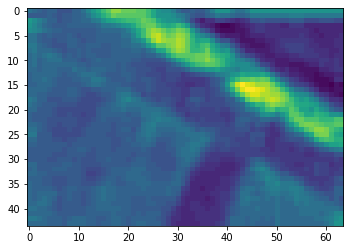

In [20]:
blurred_img = cv2.GaussianBlur(img,(3,3),10)
plt.imshow(blurred_img)

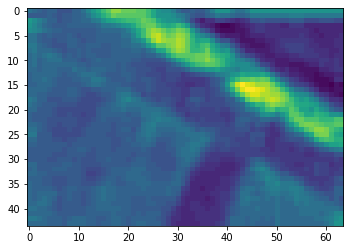

In [21]:
norm_img = cv2.normalize(blurred_img, None, 0, 1.0, cv2.NORM_MINMAX, dtype=cv2.CV_32F)
plt.imshow(norm_img)

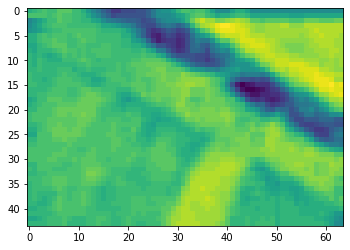

In [22]:
blurred_img = blurred_img*255
blurred_img = np.uint8(blurred_img)
plt.imshow(blurred_img)

In [23]:
med_val = np.median(img)
print(med_val)

14.0


In [24]:
lower = int(max(0, 0.7* med_val))

In [25]:
upper = 2*lower

In [26]:
edges = cv2.Canny(image=blurred_img, threshold1=lower , threshold2=upper)

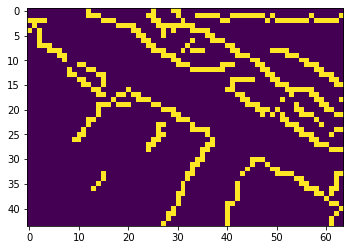

In [27]:
plt.imshow(edges)

In [28]:
rho = 1 
theta = np.pi / 180  
threshold = 20 
min_line_length = 40  
max_line_gap = 5  
line_image = np.copy(img) * 0 

lines = cv2.HoughLinesP(edges, rho, theta, threshold, np.array([]),
                    min_line_length, max_line_gap)
print(lines)
for line in lines:
    for x1,y1,x2,y2 in line:
        cv2.line(line_image,(x1,y1),(x2,y2),(255,0,0),2)

[[[14  1 62 28]]]


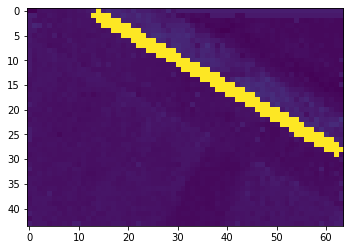

In [29]:
lines_edges = cv2.addWeighted(img, 0.8, line_image, 1, 0)
plt.imshow(lines_edges)

In [14]:
lower

97

In [15]:
upper

194

In [16]:
x_min = 37239.2 #TO BE REPLACED
y_min = 13365.6 #TO BE REPLACED
pixelSize = 0.3
for line in lines:
    for x1,y1,x2,y2 in line:
        x1 = x_min + x1 * pixelSize
        y1 = y_min + y1 * pixelSize
        x2 = x_min + x2 * pixelSize
        y2 = y_min + y2 * pixelSize
label = [x1,y1,x2,y2]
# [x1,y1,x2,y2]
print(label)

[37239.5, 13367.1, 37257.799999999996, 13377.6]
